# 基于Alpha-Beta剪枝的Minimax算法

## 井字棋
- Max：试图最大化启发式评估的玩家
- Min：试图最小化启发式评估的玩家


### 构建过程
1. 构建决策树
2. 将评估函数应用于**叶子**结点
3. 自底向上计算每个结点的**minimax**值
4. 从根结点选择minimax值最大的分支，作为行动策略

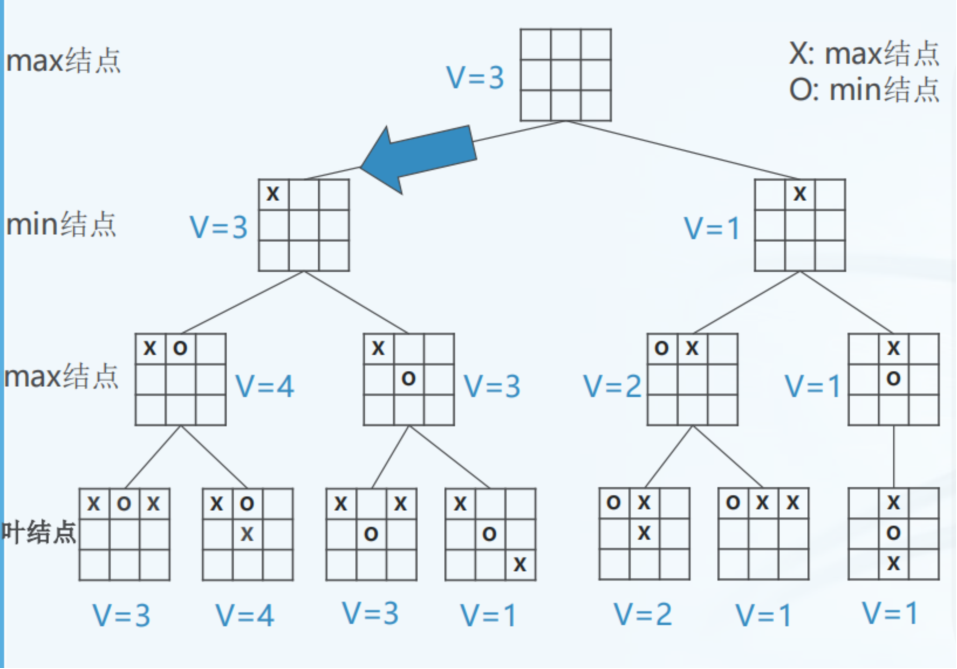

In [5]:
from IPython.display import Image
Image(filename='images/minmax.png', width=450)

### alpha剪枝

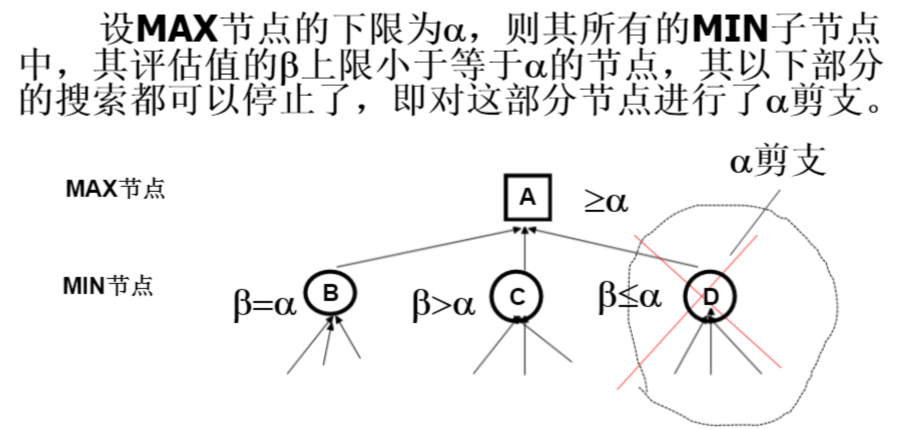

In [7]:
Image(filename='images/alpha.png', width=450)

### beta剪枝

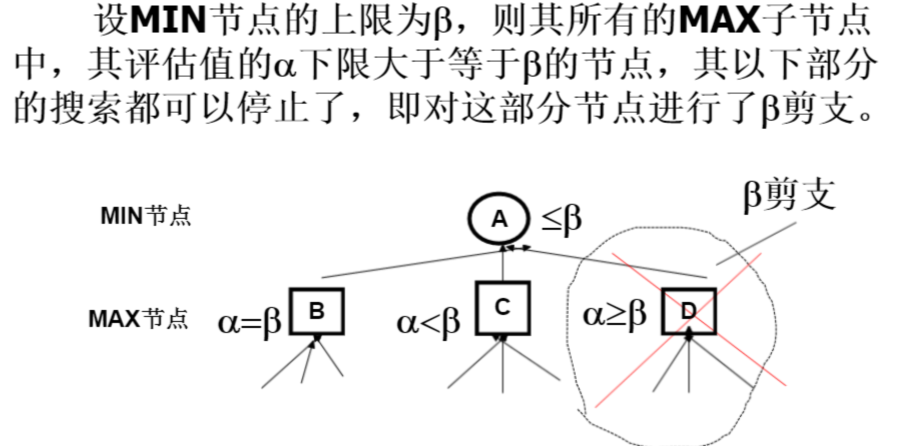

In [8]:
Image(filename='images/beta.png', width=450)

In [11]:
#!/usr/bin/env python3
'''井字棋(Tic tac toe)Python语言实现, 带有Alpha-Beta剪枝的Minimax算法.'''
'''代码参考自中国大学mooc 人工智能与信息社会（陈斌）'''
import random

# 用如下的9个数字来表示棋盘的位置:
# 0  1  2
# 3  4  5
# 6  7  8

# 设定获胜的组合方式(横、竖、斜)
WINNING_TRIADS = ((0, 1, 2), (3, 4, 5), (6, 7, 8),
                  (0, 3, 6), (1, 4, 7),(2, 5, 8),
                  (0, 4, 8), (2, 4, 6))
# 设定棋盘按一行三个打印
PRINTING_TRIADS = ((0, 1, 2), (3, 4, 5), (6, 7, 8))
# 用一维列表表示棋盘:
SLOTS = (0, 1, 2, 3, 4, 5, 6, 7, 8)
# -1表示X玩家 0表示空位 1表示O玩家.
X_token = -1
Open_token = 0
O_token = 1

MARKERS = ['_', 'O', 'X']
END_PHRASE = ('平局', '胜利', '失败')


def alpha_beta_valuation(board, player, next_player, alpha, beta):
    """运用AlphaBeta剪枝来计算当前局面的分值
       因为搜索层数少，总能搜索到最终局面，估值结果为[-1,0,1]
    """
    wnnr = winner(board)
    if wnnr != Open_token:
        # 有玩家获胜
        return wnnr
    elif not legal_move_left(board):
        # 没有空位,平局
        return 0
    # 检查当前玩家"player"的所有可落子点
    for move in SLOTS:
        if board[move] == Open_token:
            board[move] = player
            # 落子之后交换玩家，继续检验
            val = alpha_beta_valuation(board, next_player, player, alpha, beta)
            board[move] = Open_token
            if player == O_token:  # 当前玩家是O,是Max玩家(记号是1)
                if val > alpha:
                    alpha = val
                if alpha >= beta:
                    return beta  # 直接返回当前的最大可能取值beta, 进行剪枝
            else:  # 当前玩家是X,是Min玩家(记号是-1)
                if val < beta:
                    beta = val
                if beta <= alpha:
                    return alpha  # 直接返回当前的最小可能取值alpha, 进行剪枝
    if player == O_token:
        retval = alpha
    else:
        retval = beta
    return retval


def print_board(board):
    """打印当前棋盘"""
    for row in PRINTING_TRIADS:
        r = ' '
        for hole in row:
            r += MARKERS[board[hole]] + ' '
        print(r)


def legal_move_left(board):
    """ 判断棋盘上是否还有空位 """
    for slot in SLOTS:
        if board[slot] == Open_token:
            return True
    return False


def winner(board):
    """ 判断局面的胜者,返回值-1表示X获胜,1表示O获胜,0表示平局或者未结束"""
    for triad in WINNING_TRIADS:
        triad_sum = board[triad[0]] + board[triad[1]] + board[triad[2]]
        if triad_sum == 3 or triad_sum == -3:
            return board[triad[0]]  # 表示棋子的数值恰好也是-1:X,1:O
    return 0


def determine_move(board):
    """决定电脑(玩家O)的下一步棋,若估值相同则随机选取步数"""
    best_val = -2  # 本程序估值结果只在[-1,0,1]中
    my_moves = []
    print("开始思考")
    for move in SLOTS:
        if board[move] == Open_token:
            board[move] = O_token
            val = alpha_beta_valuation(board, X_token, O_token, -2, 2)
            board[move] = Open_token
            print("我如果下在", move, ",将导致", END_PHRASE[val])
            if val > best_val:
                best_val = val
                my_moves = [move]
            if val == best_val:
                my_moves.append(move)
    return random.choice(my_moves)


HUMAN = 1
COMPUTER = 0


def main():
    """主函数,先决定谁是X(先手方),再开始下棋"""
    next_move = HUMAN
    opt = input("请选择先手方，输入X表示玩家先手，输入O表示电脑先手：")
    if opt == "X":
        next_move = HUMAN
    if opt == "O":
        next_move = COMPUTER

    # 初始化空棋盘
    board = [Open_token for _ in range(9)]

    # 开始下棋
    while legal_move_left(board) and winner(board) == Open_token:
        print()
        print_board(board)
        if next_move == HUMAN and legal_move_left(board):
            humanmv = int(input("请输入你要落子的位置(0-8)："))
            board[humanmv] = X_token
            next_move = COMPUTER
        if next_move == COMPUTER and legal_move_left(board):
            mymv = determine_move(board)
            print("我选择下在", mymv)
            board[mymv] = O_token
            next_move = HUMAN

    # 输出结果
    print_board(board)
    print(["平局", "我赢了", "你赢了"][winner(board)])


if __name__ == '__main__':
    main()



请选择先手方，输入X表示玩家先手，输入O表示电脑先手：X

 _ _ _ 
 _ _ _ 
 _ _ _ 
请输入你要落子的位置(0-8)：4
开始思考
我如果下在 0 ,将导致 平局
我如果下在 1 ,将导致 失败
我如果下在 2 ,将导致 平局
我如果下在 3 ,将导致 失败
我如果下在 5 ,将导致 失败
我如果下在 6 ,将导致 平局
我如果下在 7 ,将导致 失败
我如果下在 8 ,将导致 平局
我选择下在 0

 O _ _ 
 _ X _ 
 _ _ _ 
请输入你要落子的位置(0-8)：3
开始思考
我如果下在 1 ,将导致 失败
我如果下在 2 ,将导致 失败
我如果下在 5 ,将导致 平局
我如果下在 6 ,将导致 失败
我如果下在 7 ,将导致 失败
我如果下在 8 ,将导致 失败
我选择下在 5

 O _ _ 
 X X O 
 _ _ _ 
请输入你要落子的位置(0-8)：2
开始思考
我如果下在 1 ,将导致 失败
我如果下在 6 ,将导致 平局
我如果下在 7 ,将导致 失败
我如果下在 8 ,将导致 失败
我选择下在 6

 O _ X 
 X X O 
 O _ _ 
请输入你要落子的位置(0-8)：7
开始思考
我如果下在 1 ,将导致 平局
我如果下在 8 ,将导致 失败
我选择下在 1

 O O X 
 X X O 
 O X _ 
请输入你要落子的位置(0-8)：8
 O O X 
 X X O 
 O X X 
平局
